In [17]:
# Importação de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [19]:
# Renomeando colunas e fazendo a leitura do DataFrame

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [20]:
# Exibindo os 5 primeiros registros do DataFrame 

df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [21]:
# Lendo o arquivo com título dos filmes

movie_titles = pd.read_csv("Movie_Id_Titles")

In [22]:
# # Exibindo os 5 primeiros registros do DataFrame 

movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [23]:
# Criação do DataFrame filmes, fazendo uma união dos DataFrames anteriores de acordo com o id do filme

filmes = pd.merge(df, movie_titles, on='item_id')

In [24]:
# # Exibindo os 5 primeiros registros do DataFrame 

filmes.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [29]:
# Agrupando o DataFrame filmes, considerando as colunas title e rating, fazendo a média das notas dos filmes

filmes.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [30]:
# Agrupando o DataFrame filmes, considerando as colunas title e rating, fazendo a soma 
# de todas as notas dos filmes

filmes.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [32]:
# Criação de novo DataFrame, com as colunas title e rating, sendo exibido a média das notas

ratings = pd.DataFrame(filmes.groupby('title')['rating'].mean())

In [33]:
# Exibindo os 5 primeiros registros do DataFrame

ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [34]:
# Criação da coluna count, que conta quantas notas o filme obteve

ratings['Count'] = pd.DataFrame(filmes.groupby('title')['rating'].count())

In [35]:
# # Exibindo os 5 primeiros registros do DataFrame 

ratings.head()

,rating,Count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


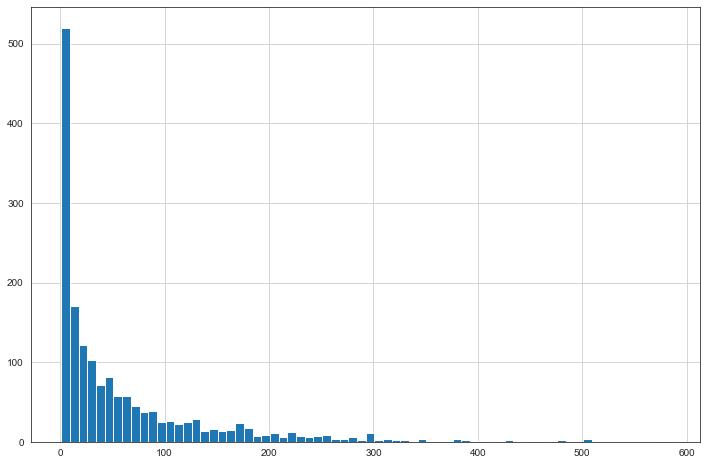

In [36]:
# Gráfico exibindo os valores da coluna count

plt.figure(figsize=(12,8))
ratings['Count'].hist(bins=70)

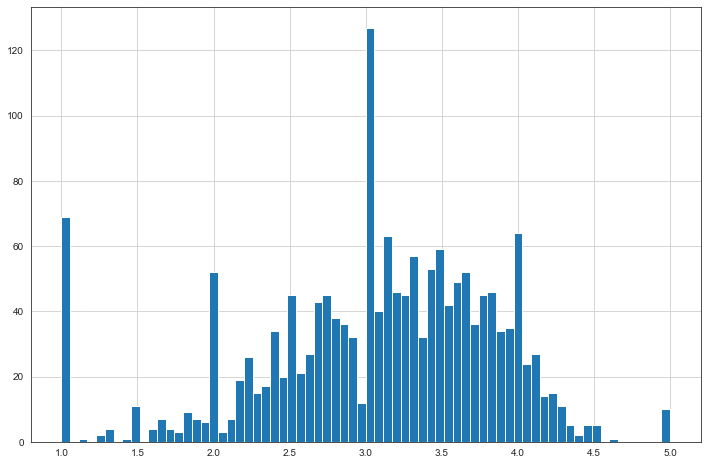

In [37]:
# Gráfico exibindo os valores da coluna rating

plt.figure(figsize=(12,8))
ratings['rating'].hist(bins=70)

C:\Users\morph\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

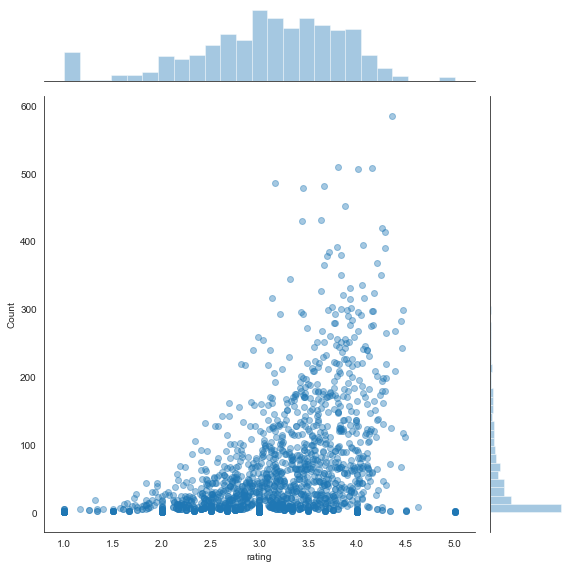

In [39]:
# Gráfico de dispersão com x = rating e y = count

plt.figure(figsize=(15,8))
sns.jointplot(x='rating', y='Count', data=ratings, alpha=0.4, size=8)

In [40]:
# Criação de um novo DataFrame, levando o usuário como indice, os valores da tabela como as notas e 
# as colunas os títulos

moviemat = filmes.pivot_table(index='user_id', columns='title', values='rating')

In [41]:
# Exibindo os 5 primeiros registros do DataFrame 

moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
moviemat.shape

(944, 1664)

In [44]:
# Organizando os valores do DataFrame ratings de forma decrescente

ratings.sort_values('Count', ascending=False).head()

,rating,Count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [45]:
# vendo os registros do filme selecionado em relação a nota recebida de cada usuário

starwars_user_ratings = moviemat['Star Wars (1977)']

In [46]:
# Exibindo registros

starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [47]:
# vendo os registros do filme selecionado em relação a nota recebida de cada usuário

liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [48]:
# Exibindo registros

liarliar_user_ratings

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [50]:
# exibindo a correlação das notas dos filmes com a nota do filme star wars

similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\Users\morph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\morph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [51]:
# exibindo os 10 primeiros registros

similar_to_starwars.head(10)

title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

In [52]:
# exibindo a correlação das notas dos filmes com a nota do filme liar liar


similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [54]:
# exibindo os 10 primeiros registros

similar_to_liarliar.head(10)

title
'Til There Was You (1997)                      0.118913
1-900 (1994)                                        NaN
101 Dalmatians (1996)                          0.469765
12 Angry Men (1957)                            0.066272
187 (1997)                                     0.175145
2 Days in the Valley (1996)                    0.040739
20,000 Leagues Under the Sea (1954)           -0.027932
2001: A Space Odyssey (1968)                  -0.057864
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.400918
dtype: float64

In [55]:
# Transformação da correlação em DataFrame, contendo as colunas title e Correlation, excluindo
# dados faltantes

corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [56]:
# Organizando os valores númericos de forma decrescente

corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


In [57]:
# adicionando a coluna count do DataFrame ratings 

corr_starwars = corr_starwars.join(ratings['Count'])

In [58]:
# Exibindo os 5 primeiros registros do DataFrame

corr_starwars.head()

,Correlation,Count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [59]:
# Exibindo quetiveram mais opiniões acima de 100, ao lado do título e sua correlação de forma decrescente

corr_starwars[corr_starwars['Count']>100].sort_values('Correlation', ascending = False).head(10)

,Correlation,Count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [60]:
# Transformação da correlação em DataFrame, contendo as colunas title e Correlation

corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])

In [61]:
# excluindo dados faltantes

corr_liarliar.dropna(inplace=True)

In [62]:
# adicionando a coluna count do DataFrame ratings 

corr_liarliar = corr_liarliar.join(ratings['Count'])

In [63]:
# Exibindo quetiveram mais opiniões acima de 100, ao lado do título e sua correlação de forma decrescente

corr_liarliar[corr_liarliar['Count']>100].sort_values('Correlation', ascending = False).head(10)

,Correlation,Count
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
